<a href="https://colab.research.google.com/github/MLcmore2023/MLcmore2023/blob/main/day7_am_morning/D7_M_Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Setting up the Environment

The FrozenLake environment is a grid world where an agent starts in the top-left corner and tries to reach the goal in the bottom-right corner while avoiding holes.

### 1.1: Description of the Environment:

- **State Space:** Each cell in the grid is a state. In a 4x4 grid, there are 16 states.
- **Action Space:** At any state, the agent can move in 4 directions - Left (0), Down (1), Right (2), Up (3).
- **Transition Function:** The transition from one state to another depends on the action taken and the ice's slipperiness. Even if the agent chooses to go right, it might slip to another direction.
- **Reward:** +1 for reaching goal state otherwise 0

The FrozenLake environment is a popular gridworld environment from OpenAI's `gym` library. It's a simple text-based game that is often used as a toy problem to learn and demonstrate reinforcement learning algorithms.


1. **Grid**: The environment is a square grid of cells, typically 4x4 or 8x8. Each cell in the grid can be one of the following:

    - `S`: starting point, and it's safe.
    - `F`: frozen surface, and it's safe.
    - `H`: hole, and it's not safe. If the agent enters it, the episode terminates.
    - `G`: goal, the destination point.

   For a 4x4 grid, a typical representation could be:
   
   ```
   SFFF
   FHFH
   FFFH
   HFFG
   ```

2. **Objective**: The objective of the agent is to navigate from the starting point (`S`) to the goal (`G`) without falling into a hole (`H`). The agent gets a reward of 1 upon reaching the goal and 0 otherwise.

3. **Actions**: At each state (i.e., grid cell), the agent can take one of 4 possible actions:

    - Left (0)
    - Down (1)
    - Right (2)
    - Up (3)

4. **Stochasticity**: A unique challenge in the FrozenLake environment is the "slippery ice". When the `is_slippery` flag is set to `True` (as in most standard versions), the agent doesn't always move in the direction it intends. There's a probability it might move to the left or right of the intended direction. This introduces stochastic transitions in the environment.

5. **Reward**:

   **Goal (G)**: If the agent reaches the goal, it gets a reward of +1.

   **Hole (H)**: If the agent falls into a hole, it gets a reward of 0.

   **Frozen Surface (F)** & **Start (S)**: For all other transitions, including moving on the frozen surface or being at the starting position, the reward is 0.

It's crucial to highlight that, in FrozenLake, the primary motivation for the agent is to reach the goal. The reward system is **sparse**. A reward of +1 is only given upon reaching the goal, while all other actions result in a reward of 0. This makes the environment challenging because the agent has to figure out a path to the goal based primarily on the lack of negative feedback (i.e., not falling in a hole) rather than continuous positive feedback.

** This sparsity makes algorithms like **Q-learning** quite suitable for this environment because Q-learning is explicitly designed to handle the credit assignment problem, where an agent learns to assign credit to actions taken in the past based on delayed rewards.

#### Environment Dynamics:

The `P` attribute of the environment provides the transition probabilities. For a particular state and action, `P[state][action]` gives a list of transition tuples. Each tuple has the form `(probability, nextstate, reward, done)`, where:
- `probability` is the probability of the transition.
- `nextstate` is the state we transition to.
- `reward` is the reward obtained.
- `done` is a boolean flag indicating if the episode ends after the transition (like falling in a hole or reaching the goal).

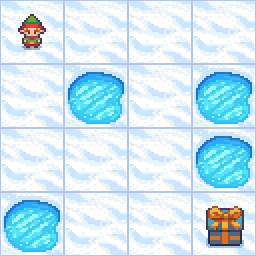

In [1]:
!apt-get install -y xvfb x11-utils
%pip install pyvirtualdisplay
%pip install piglet

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
x11-utils is already the newest version (7.7+5build2).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

# Set up virtual display
display = Display(visible=0, size=(1400, 900))
display.start()

In [3]:
# Making Frozen Lake Environment
env = gym.make('FrozenLake-v1', is_slippery=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
# Size of observation space (state space)
env.observation_space.n

16

In [5]:
# Size of action space
env.action_space.n

4

In [6]:
# Transition Function for each tuple (state, action)
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

### step() and reset():
When working with environments in OpenAI's `gym` library, like FrozenLake, two of the most commonly used methods are `step()` and `reset()`. These functions are essential for interacting with and controlling the flow of an episode within the environment.

### 1. `step()`

The `step()` function is used to advance the environment by one timestep based on the action provided by the agent.

**Usage:**
```python
observation, reward, done, info = env.step(action)
```

**Returns:**

- `observation` (often referred to as `next_state`): The state of the environment after the action is taken.
  
- `reward`: The immediate reward obtained after executing the action.
  
- `done`: A boolean flag indicating whether the episode has ended or not. In the context of FrozenLake, an episode ends when the agent reaches the goal or falls into a hole.
  
- `info`: A dictionary that might contain additional information for debugging. Its content may vary across different environments, and in many cases, it might be empty.

**Working:**
When the `step()` function is called with an action, the environment responds with the next state (`observation`), the reward due to the action, whether the episode has terminated (`done`), and any additional `info` if available.

### 2. `reset()`

The `reset()` function is used to start a new episode by initializing the environment to its starting state.

**Usage:**
```python
initial_observation = env.reset()
```

**Returns:**

- `initial_observation`: The initial state of the environment at the beginning of a new episode.

**Working:**
When training an agent, episodes will continuously start and end. Once an episode terminates (when the `done` flag from the `step()` function is `True`), you'll often want to start a new episode to continue training. By calling `reset()`, the environment is returned to its initial state, and a new episode can begin.

In the context of FrozenLake, `reset()` will put the agent back to the starting position, allowing it to try to reach the goal again in a fresh episode.

In [7]:
# Reset the environment and return initial state
# Initial state always is 0
start_state = env.reset()
print(start_state)

0


In [8]:
# Step function
env.reset()
action = env.action_space.sample()
obs, reward, done, info = env.step(action)
print(f"Action: {action}, Observation: {obs}, Reward: {reward}, is_done: {done}, info: {info}")

Action: 2, Observation: 1, Reward: 0.0, is_done: False, info: {'prob': 0.3333333333333333}


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


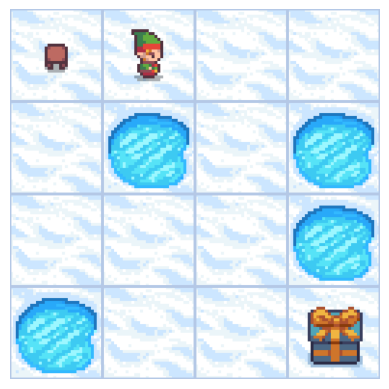

In [9]:
ipythondisplay.clear_output(wait=True)
plt.imshow(env.render(mode='rgb_array'))
plt.axis('off')
plt.show()

## Exercise 1:

#### 1.1 Define an MDP for FrozenLake environment in 8x8 grid with and without slippery. Compare the transition probability function in slippery and non-slippery versions. Run a full episode of both version and compare the behavior of the agent.
#### 1.2 Calculate the transition probability matrix analytically by hand and compare it with the one given by gym.



### Step 2. Calculate state-action value function `Q(s,a)`

#### Expected Value Calculation:

Given state $s$ and action $a$, the expected value of performing action $a$ in state $s$ is:

$Q(s,a) = \sum_{s'} P(s' | s, a) [R(s,a,s') + \gamma V(s')]$

Where:
- $P(s' | s, a)$ is the transition probability from state $s$ to state $s'$ upon taking action $a$.
- $R(s,a,s')$ is the reward for moving from state $s$ to state $s'$ due to action $a$.
- $\gamma$ is the discount factor.
- $V(s')$ is the value of the next state $s'$.

In [10]:
def compute_value_for_action(env, state, action, V, discount_factor=1.0):
    value = 0
    for prob, next_state, reward, done in env.P[state][action]:
        value += prob * (reward + discount_factor * V[next_state])
    return value


### Step 3. Policy Iteration Algorithm

Policy Iteration involves two main steps:

1. **Policy Evaluation**: Estimate the state-value function for the current policy.
2. **Policy Improvement**: Derive a new policy from the current value function.

Formulations:
1. Policy Evaluation:

$V^\pi(s) = \sum_a \pi(a|s) \sum_{s'} P(s' | s, a) [R(s,a,s') + \gamma V^\pi(s')]$

2. Policy Improvement:

$\pi'(s) = \arg\max_a Q(s,a)$

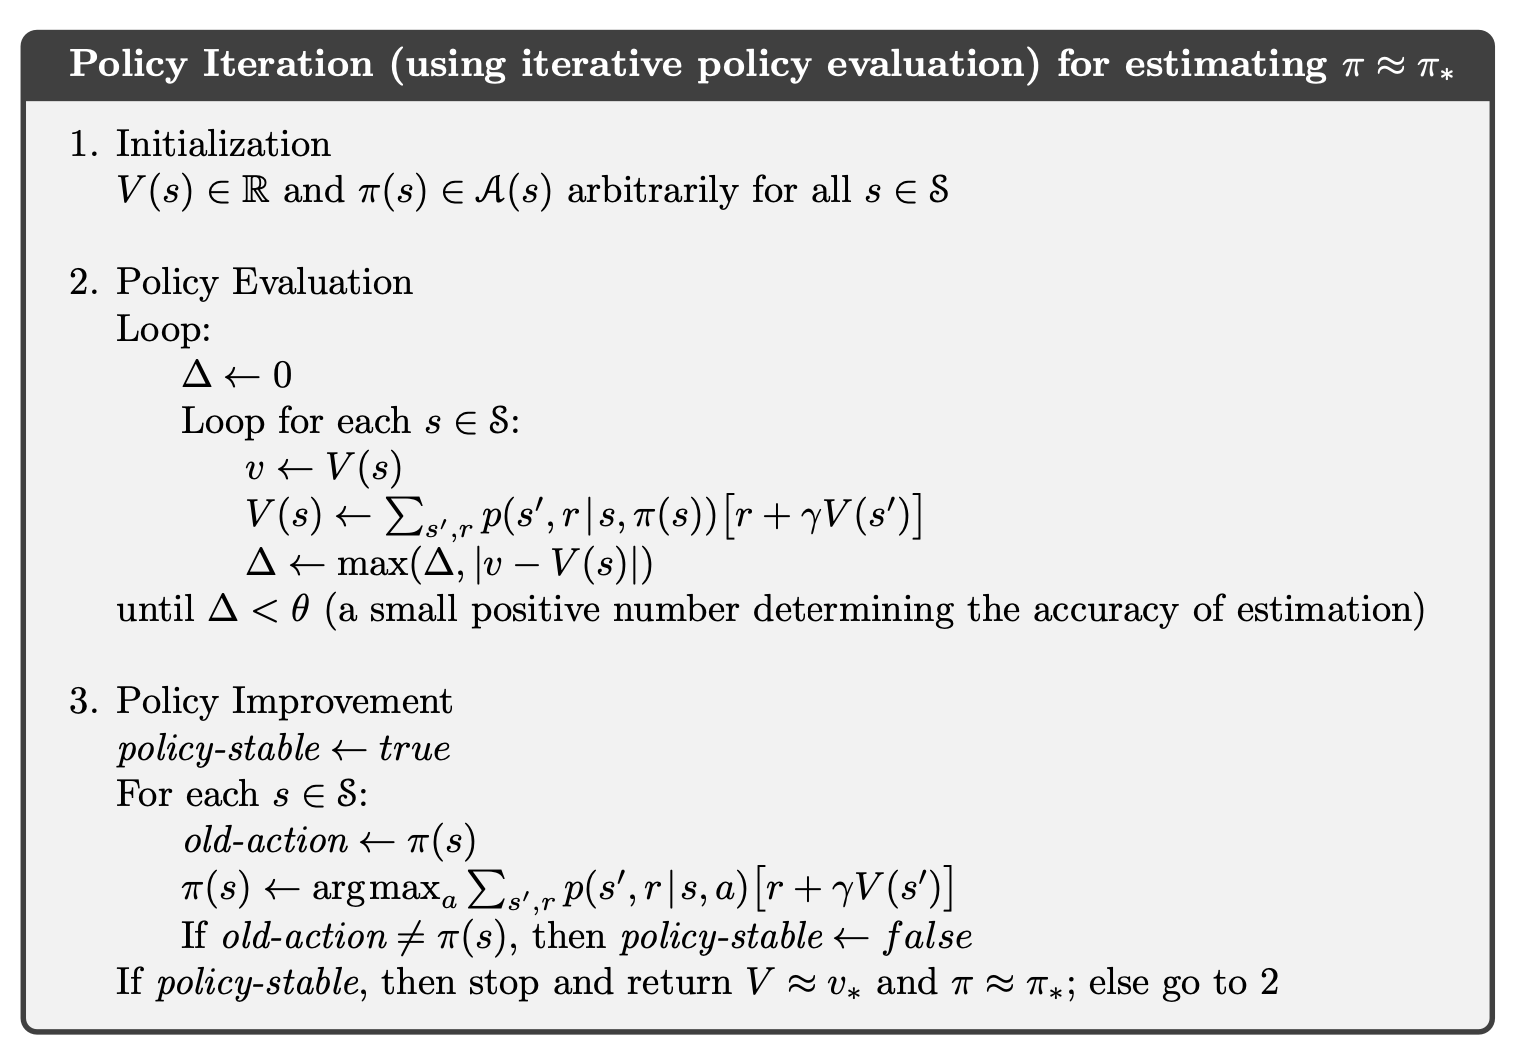

### 3.1 Policy Evaluation

In [11]:
def policy_evaluation(policy, env, discount_factor=1.0, theta=1e-8):
    iter = 0
    V = np.zeros(env.observation_space.n)
    while True:
        iter += 1
        delta = 0
        for state in range(env.observation_space.n):
            v = 0
            for action, action_prob in enumerate(policy[state]):
                v += action_prob * compute_value_for_action(env, state, action, V, discount_factor)
            delta = max(delta, np.abs(v - V[state]))
            V[state] = v
        if delta < theta:
            break
    return iter, V

### 3.2 Policy Improvement

In [12]:
def policy_improvement(env, policy_eval_fn=policy_evaluation, discount_factor=1.0):
    iter = 0
    total_eval_iter = 0
    policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n
    while True:
        iter += 1
        eval_iter, V = policy_eval_fn(policy, env, discount_factor)
        total_eval_iter += eval_iter
        policy_stable = True
        for state in range(env.observation_space.n):
            chosen_action = np.argmax(policy[state])
            action_values = np.array([compute_value_for_action(env, state, action, V, discount_factor) for action in range(env.action_space.n)])
            best_action = np.argmax(action_values)
            if chosen_action != best_action:
                policy_stable = False
            policy[state] = np.eye(env.action_space.n)[best_action]
        if policy_stable:
            return total_eval_iter, iter, policy, V

### Step 4: Value Iteration

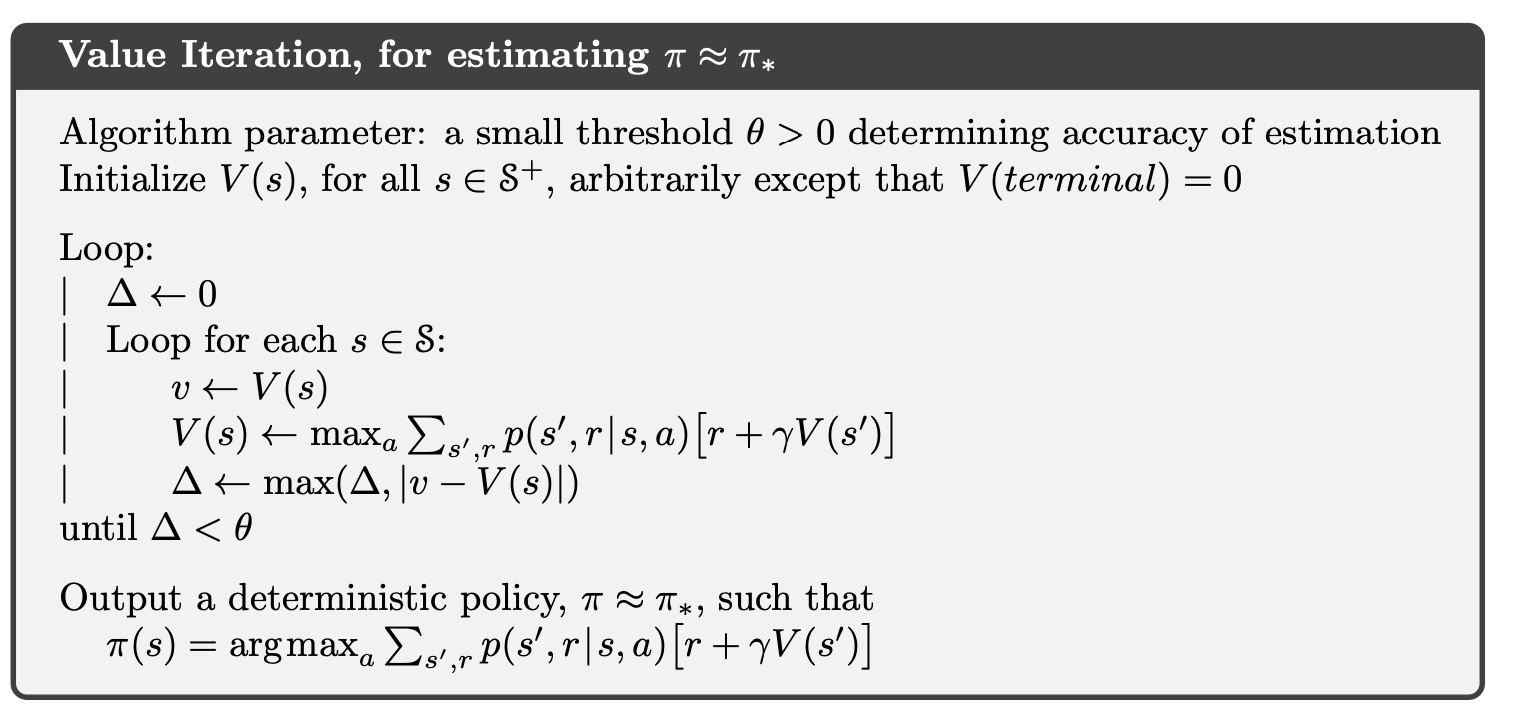



### 4.1: Implementing Value Iteration:

In [13]:
def value_iteration(env, theta=1e-8, discount_factor=1.0):
    iter = 0
    V = np.zeros(env.observation_space.n)
    while True:
        iter += 1
        delta = 0
        for state in range(env.observation_space.n):
            action_values = np.array([compute_value_for_action(env, state, action, V, discount_factor) for action in range(env.action_space.n)])
            best_action_value = np.max(action_values)
            delta = max(delta, np.abs(best_action_value - V[state]))
            V[state] = best_action_value
        if delta < theta:
            break
    policy = np.zeros([env.observation_space.n, env.action_space.n])
    for state in range(env.observation_space.n):
        action_values = np.array([compute_value_for_action(env, state, action, V, discount_factor) for action in range(env.action_space.n)])
        best_action = np.argmax(action_values)
        policy[state, best_action] = 1.0
    return iter, policy, V

### Step 5: Running and Comparing Algorithms

In [14]:
# Run Value Iteration
VI_iter, value_policy, value_V = value_iteration(env)

# Run Policy Iteration
total_eval_iter, PI_iter, policy_policy, policy_V = policy_improvement(env)

print("Value Iteration Policy:")
print(value_policy)
print("Value Iteration Value Function:")
print(value_V)
print("Number of Iterations:")
print(VI_iter)

print("\nPolicy Iteration Policy:")
print(policy_policy)
print("Policy Iteration Value Function:")
print(policy_V)
print("Number of Iterations:")
print(total_eval_iter, PI_iter)

Value Iteration Policy:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
Value Iteration Value Function:
[0.82352924 0.82352918 0.82352915 0.82352913 0.82352926 0.
 0.52941165 0.         0.82352928 0.82352932 0.7647058  0.
 0.         0.88235288 0.94117644 0.        ]
Number of Iterations:
456

Policy Iteration Policy:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
Policy Iteration Value Function:
[0.82352924 0.82352919 0.82352915 0.82352913 0.82352926 0.
 0.52941165 0.         0.82352929 0.82352932 0.7647058  0.
 0.         0.88235288 0.94117644 0.        ]
Number of Iterations:
877 3


In [15]:
def run_episode(env, policy, render=False):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = np.argmax(policy[state])
        next_state, reward, done, _ = env.step(action)
        total_reward += reward

        if render:
            ipythondisplay.clear_output(wait=True)
            plt.imshow(env.render(mode='rgb_array'))
            plt.axis('off')
            plt.show()

            print(f"Episode Reward: {total_reward}")
            ipythondisplay.display(plt.gcf())

        state = next_state
    print(total_reward)
    return total_reward

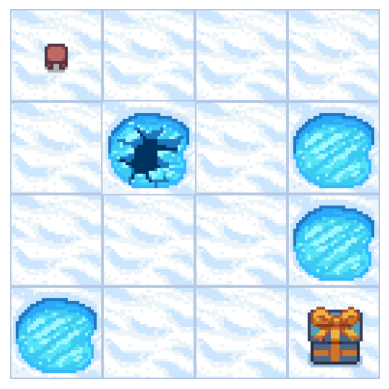

Episode Reward: 0.0


<Figure size 640x480 with 0 Axes>

0.0


<Figure size 640x480 with 0 Axes>

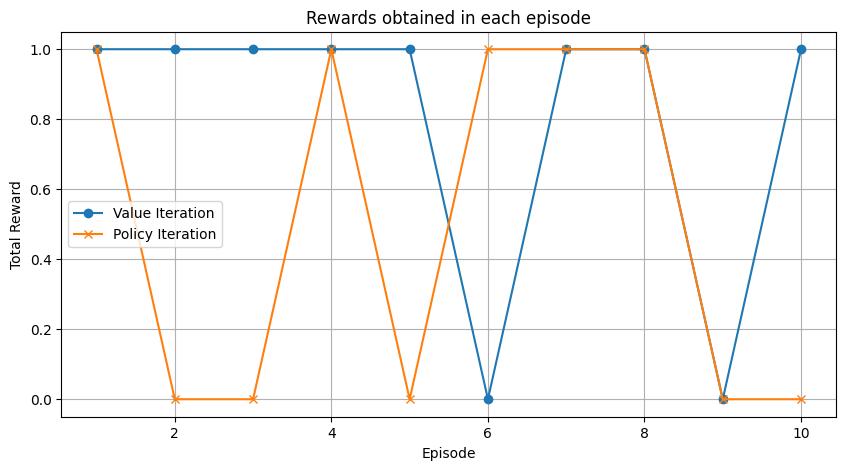

In [16]:
# Run episodes using learned policies
num_episodes = 10
value_iter_rewards = [run_episode(env, value_policy, render=True) for _ in range(num_episodes)]
policy_iter_rewards = [run_episode(env, policy_policy, render=True) for _ in range(num_episodes)]

# Plot rewards
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_episodes + 1), value_iter_rewards, label="Value Iteration", marker='o')
plt.plot(range(1, num_episodes + 1), policy_iter_rewards, label="Policy Iteration", marker='x')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Rewards obtained in each episode")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2:

Re-run value iteration and policy iteration algorithms in FrozenLake environment with 8x8, with and without slippery setup. Compare the number of iterations with 4x4. How does slippery setup affect on speed of convergence?

## Policy Evaluation using Closed-form Solution


### Formulation:

Given a policy $\pi$, the objective is to find the value function $V^\pi$ using matrix operations. Let's define some notations:

- $P$: Transition probability matrix.
- $R$: Expected reward vector.
- $V$: Value function vector.
- $I$: Identity matrix.
- $\gamma$: Discount factor.

The Bellman expectation equation for policy evaluation can be written as:

$V^\pi = R + \gamma P V^\pi$

To solve for $V^\pi$, rearrange the equation:

$V^\pi - \gamma P V^\pi = R$

This is equivalent to:

$(I - \gamma P) V^\pi = R$

From the above equation, $V^\pi$ can be isolated:

$V^\pi = (I - \gamma P)^{-1} R$

### Breakdown:

1. `prob_a = np.zeros((env.observation_space.n, env.observation_space.n))`: Initializes the transition probability matrix $P$ where `prob_a[s][s']` is the probability of transitioning from state $s$ to state $s'$ under policy $\pi$.

2. `reward_s = np.zeros(env.observation_space.n)`: Initializes the expected reward vector $R$.

3. The nested for-loop constructs the $P$ matrix and $R$ vector based on the policy $\pi$ and the environment's transition dynamics.

4. `v = np.linalg.inv(np.eye(env.observation_space.n) - gamma * prob_a) @ reward_s`: This line of code solves for the value function $V^\pi$ using the matrix equation derived above. It involves:
   - Computing $(I - \gamma P)$
   - Inverting this matrix: $(I - \gamma P)^{-1}$
   - Multiplying with $R$ to get $V^\pi$

The resultant value function $V^\pi$ represents the expected cumulative reward starting from each state and following the policy $\pi$.

In [17]:
def policy_evaluation_matrix(policy, env, gamma=1.0):
    """
    Evaluate a policy given an environment using a closed-form matrix approach.

    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
        gamma: Discount factor.

    Returns:
        Value function as a vector of length env.observation_space.n.
    """

    # Initialize the transition probability matrix and reward vector
    P_pi = np.zeros((env.observation_space.n, env.observation_space.n))
    R_pi = np.zeros(env.observation_space.n)

    for s in range(env.observation_space.n):
        for a, action_prob in enumerate(policy[s]):
            for prob, next_state, reward, _ in env.P[s][a]:
                P_pi[s, next_state] += action_prob * prob
                R_pi[s] += action_prob * prob * reward
    print(P_pi, R_pi)
    # Closed-form solution
    V_pi = np.linalg.solve(np.eye(env.observation_space.n) - gamma * P_pi, R_pi)

    return V_pi

## Compare closed-form solution and numerical solution

In [18]:
random_policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n

V_closed = policy_evaluation_matrix(random_policy, env)

print("Closed-form value function of policy iteration policy:")
print(V_closed)

print("Value function returned by policy iteration:")
print(policy_V)

[[0.5  0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.25 0.25 0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.25 0.25 0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.25 0.5  0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.25 0.   0.   0.   0.25 0.25 0.   0.   0.25 0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.25 0.   0.   0.25 0.   0.25 0.   0.   0.25 0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.25 0.25 0.   0.   0.25 0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.25 0.   0.25 0.   0.   0.25
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.25 0.   0.25 0.   0.
  0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.
  0.   0.  ]
 [

LinAlgError: ignored